In [1]:
!ls vad-dataset/ | wc -l

900


In [2]:
!ls vad-dataset | head -n5

down_0132a06d_nohash_4.wav
down_063d48cf_nohash_0.wav
down_0a9f9af7_nohash_0.wav
down_0ff728b5_nohash_4.wav
down_14872d06_nohash_0.wav
ls: write error: Broken pipe


In [3]:
from preprocessing import get_audio_and_label

filename = './vad-dataset/down_0132a06d_nohash_4.wav'
audio, sampling_rate, label = get_audio_and_label(filename)

print(sampling_rate.numpy(), label.numpy().decode())

2022-11-04 23:02:03.310209: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-04 23:02:03.421944: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-04 23:02:03.427148: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-04 23:02:03.427169: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [4]:
import IPython
IPython.display.Audio(filename=filename, rate=sampling_rate)

In [4]:
import pandas as pd
import numpy as np

plot = {
    'Time (s)': np.linspace(0, 1, sampling_rate.numpy())[0::10],
    'Amplitude': audio.numpy().squeeze()[0::10]
}
plot_df = pd.DataFrame(plot)

In [6]:
plot_df

,Time (s),Amplitude
0,0.000000,-0.000092
1,0.000625,-0.000153
2,0.001250,-0.000061
3,0.001875,-0.000153
4,0.002500,-0.000183
...,...,...
1595,0.996937,-0.000458
1596,0.997562,-0.000092
1597,0.998187,0.000031
1598,0.998812,-0.000031


In [7]:
DeepnoteChart(plot_df, """{"mark":{"type":"line","tooltip":true},"$schema":"https://vega.github.io/schema/vega-lite/v4.json","encoding":{"x":{"sort":null,"type":"quantitative","field":"Time (s)","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Amplitude","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}},"height":440,"width":"container","autosize":{"type":"fit"},"config":{"legend":{"labelFont":"Inter, sans-serif","labelFontSize":12,"titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold"},"title":{"anchor":"start","color":"#000000","font":"Inter, sans-serif","fontSize":22,"fontWeight":"normal"},"axis":{"labelFont":"Inter, sans-serif","labelFontSize":12,"labelFontWeight":"normal","titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold","labelOverlap":"greedy"}}}""")

In [9]:
from preprocessing import get_spectrogram

downsampling_rate = sampling_rate

spectrogram, sampling_rate, label = get_spectrogram(filename, downsampling_rate, 0.04, 0.04)

In [10]:
spectrogram.shape

TensorShape([25, 321])

In [6]:
import tensorflow as tf


dbFS = 20 * tf.math.log(spectrogram + 1.e-6)
energy = tf.math.reduce_mean(dbFS, axis=1)

plot_data = {
    'Time (s)': np.arange(0, 1, 0.04),
    'Energy (dbFS)': energy,
}
plot_df = pd.DataFrame(plot_data)
plot_df

,Time (s),Energy (dbFS)
0,0.00,-171.418213
1,0.04,-167.813522
2,0.08,-186.909851
3,0.12,-167.360321
4,0.16,-178.358643
5,0.20,-167.562347
6,0.24,-187.386078
7,0.28,-162.765167
8,0.32,-110.837448
9,0.36,-60.360954


In [7]:
DeepnoteChart(plot_df, """{"mark":{"type":"bar","tooltip":true},"$schema":"https://vega.github.io/schema/vega-lite/v4.json","encoding":{"x":{"sort":null,"type":"quantitative","field":"Time (s)","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"Energy (dbFS)","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}},"height":440,"width":"container","autosize":{"type":"fit"},"config":{"legend":{"labelFont":"Inter, sans-serif","labelFontSize":12,"titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold"},"title":{"anchor":"start","color":"#000000","font":"Inter, sans-serif","fontSize":22,"fontWeight":"normal"},"axis":{"labelFont":"Inter, sans-serif","labelFontSize":12,"labelFontWeight":"normal","titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold","labelOverlap":"greedy"}}}""")

In [11]:
non_silence = energy > -100
non_silence

<tf.Tensor: shape=(25,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False])>

Text(0, 0.5, 'Amplitude')

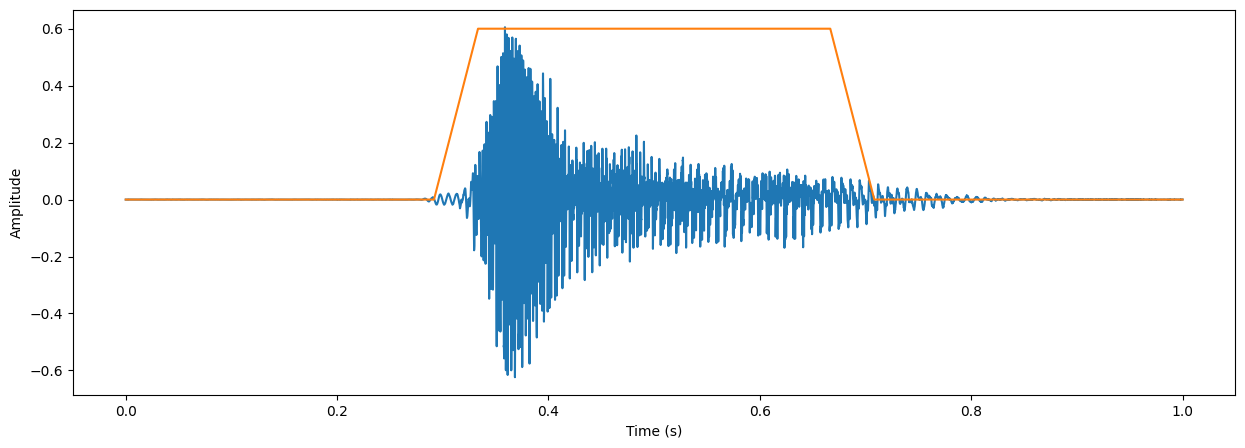

In [12]:
import matplotlib.pyplot as plt


time_in_s = np.linspace(0, 1, sampling_rate.numpy())
non_silence_vis = non_silence.numpy() * 0.60
non_silence_vis


plt.figure(figsize=(15, 5))
plt.plot(time_in_s, audio.numpy())
plt.plot(np.linspace(0, 1, non_silence_vis.shape[0]), non_silence_vis)

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [13]:
non_silence_frames = tf.math.reduce_sum(tf.cast(non_silence, tf.float32))
non_silence_duration = (non_silence_frames + 1) * 0.04
print(f'Speech duration {non_silence_duration.numpy():.2f} s')

Speech duration 0.40 s


In [24]:
def is_silence(filename, downsampling_rate, frame_length_in_s, dbFSthres, duration_thres):
    spectrogram, sampling_rate, label = get_spectrogram(
        filename,
        downsampling_rate,
        frame_length_in_s,
        frame_length_in_s
    )
    dbFS = 20 * tf.math.log(spectrogram + 1.e-6)
    energy = tf.math.reduce_mean(dbFS, axis=1)
    non_silence = energy > dbFSthres
    non_silence_frames = tf.math.reduce_sum(tf.cast(non_silence, tf.float32))
    non_silence_duration = (non_silence_frames + 1) * frame_length_in_s

    if non_silence_duration > duration_thres:
        return 0
    else:
        return 1

In [15]:
is_silence('vad-dataset/down_14872d06_nohash_0.wav', 16000, 0.04, -100, 0.1)

0

In [16]:
is_silence('./vad-dataset/silence_027.wav', 16000, 0.04, -100, 0.1)

1

In [23]:
from glob import glob
from time import time

# filenames = glob('vad-dataset/*')

# correct = 0
# tot_time = 0
# for filename in filenames:
#     audio, sampling_rate, label = get_audio_and_label(filename)
#     is_true_silence = label.numpy().decode() == 'silence'
#     start = time()
#     predicted_silence = is_silence(filename, 16000, 0.040, -100, 0.1)
#     end = time()
#     tot_time += end - start

#     if predicted_silence != is_true_silence:
#         print(filename, predicted_silence)
#     else:
#         correct += 1
    
# accuracy = correct / len(filenames)
# print(f'Accuracy: {100 * accuracy:.2f}%')

# avg_time_s = tot_time / len(filenames)
# avg_time_ms = avg_time_s * 1000.
# print(f'Avg Latency: {avg_time_ms:.0f}ms')

In [25]:
# function to test the VAD, returns Accuracy and Average Latency

def testVAD(downsampling_rate, frame_length_in_s, dbFSthresh, duration_time):
    # I added this
    print("PARAMETERS:")
    print(f'downsampling_rate : {downsampling_rate}')
    print(f'frame_length_in_s : {frame_length_in_s}')
    print(f'dbFSthresh : {dbFSthresh}')
    print(f'duration_time : {duration_time}')

    # downsampling_rate = tf.convert_to_tensor(downsampling_rate, dtype=tf.int64)
    # frame_length_in_s = tf.convert_to_tensor(frame_length_in_s, dtype=tf.float32)
    # dbFSthresh = tf.convert_to_tensor(dbFSthresh, dtype=tf.float32)
    # duration_time = tf.convert_to_tensor(duration_time, dtype=tf.float32)

    correct = 0
    tot_time = 0
    count = 0
    for filename in glob("vad-dataset/*"):  # for all file in the folder
        audio, sampling_rate, label = get_audio_and_label(filename)
        is_true_silence = label.numpy().decode() == 'silence'

        start = time()
        predicted_silence = is_silence(filename, downsampling_rate, frame_length_in_s, dbFSthresh, duration_time)
        end = time()
        tot_time += end - start

        if predicted_silence != is_true_silence:
            # print(filename, predicted_silence)
            pass
        else:
            correct += 1
       
        count += 1

        # if count > 10:
        #     break

    accuracy = correct / len(glob('vad-dataset/*'))
    print(f'Accuracy: {accuracy * 100}%')

    time_avg = tot_time / count * 1000
    print(f'Avg Latency {time_avg:.0f} ms')

    return accuracy, time_avg



In [26]:
# hyperparameter tuning 

import itertools

# downsampling rate != 16000 -> warnings and increase latency since downsampling is expansive
# frame_lenght_in_s -> the smaller it is the smaller dim1 of the spectogram is
# dbFSthresh -> only influences accuracy
# duration_time -> the higher the smaller dim0 of the spectogram is

# best:
# 1600, 0.002, -130, 0.05
# accracy: 0.983
# latency: 8.678

params = {
    'downsampling_rate': [16000],
    'frame_length_in_s': [.002],
    'dbFSthresh': [-130],
    'duration_time': [.05]
}

# params = {
#     'downsampling_rate': [16000],
#     'frame_length_in_s': [.0004, .0002, .002, .04],
#     'dbFSthresh': [-130, -120, -110, -100, -90, -80],
#     'duration_time': [.1, .15, .2, .05, .01, .005]
# }

df = pd.DataFrame(columns=['downsampling_rate', 'frame_lenght_in_s', 'dbFSthresh', 'duration_time',
                            'accuracy', 'latency'
                        ])

keys = list(params)
# this func does a combination of all the hyperparmam .prodcut, similar to a grid search. 
for values in itertools.product(*map(params.get, keys)):
    d = dict(zip(keys, values))  # dict with parameter
    accuracy, latency = testVAD(**d)
    l = [d['downsampling_rate'], d['frame_length_in_s'], d['dbFSthresh'], d['duration_time'],
            accuracy, latency
        ]
    df.loc[len(df)] = l  # add new line to dataframe

PARAMETERS:
downsampling_rate : 16000
frame_length_in_s : 0.002
dbFSthresh : -130
duration_time : 0.05
Accuracy: 98.33333333333333%
Avg Latency 9 ms


In [20]:
# df.to_csv("VAD.csv", index=False)

In [15]:
df = pd.read_csv("VAD.csv")
df

,downsampling_rate,frame_lenght_in_s,dbFSthresh,duration_time,accuracy,latency
0,16000.0,0.0004,-130.0,0.100,0.978889,9.534769
1,16000.0,0.0004,-130.0,0.150,0.963333,9.478783
2,16000.0,0.0004,-130.0,0.200,0.951111,9.467845
3,16000.0,0.0004,-130.0,0.050,0.971111,9.368047
4,16000.0,0.0004,-130.0,0.010,0.880000,9.457224
...,...,...,...,...,...,...
139,16000.0,0.0400,-80.0,0.150,0.838889,11.362090
140,16000.0,0.0400,-80.0,0.200,0.703333,11.249536
141,16000.0,0.0400,-80.0,0.050,0.901111,11.343082
142,16000.0,0.0400,-80.0,0.010,0.888889,11.288281


In [19]:
best_df = df[(df['accuracy'] > .98) & (df['latency'] < 9)] 
best_df

,downsampling_rate,frame_lenght_in_s,dbFSthresh,duration_time,accuracy,latency
75,16000.0,0.002,-130.0,0.050,0.983333,8.678066
76,16000.0,0.002,-130.0,0.010,0.987778,8.690403
77,16000.0,0.002,-130.0,0.005,0.986667,8.649540
82,16000.0,0.002,-120.0,0.010,0.982222,8.634420
83,16000.0,0.002,-120.0,0.005,0.983333,8.668118


In [22]:
DeepnoteChart(best_df, """{"mark":{"type":"bar","tooltip":true},"$schema":"https://vega.github.io/schema/vega-lite/v4.json","encoding":{"x":{"sort":null,"type":"quantitative","field":"accuracy","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"latency","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}},"height":440,"width":"container","autosize":{"type":"fit"},"config":{"legend":{"labelFont":"Inter, sans-serif","labelFontSize":12,"titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold"},"title":{"anchor":"start","color":"#000000","font":"Inter, sans-serif","fontSize":22,"fontWeight":"normal"},"axis":{"labelFont":"Inter, sans-serif","labelFontSize":12,"labelFontWeight":"normal","titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold","labelOverlap":"greedy"}}}""")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1479b8a6-e5b3-45fe-9b0d-b80a7e9746ba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>